### Author: Sangeeths Chandrakunmar

### Random Forest Regression

### Import Libraries

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Importiere verarbeitete Daten

In [2]:
file_path = 'ds_salaries.csv'
ds_salaries = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Data Cleaning and Preprocessing

In [3]:
ds_salaries_cleaned = ds_salaries.drop(['salary', 'salary_currency'], axis=1)


categorical_cols = ds_salaries_cleaned.select_dtypes(include=['object', 'category']).columns
numerical_cols = ds_salaries_cleaned.select_dtypes(include=['int64', 'float64']).columns.drop('salary_in_usd')


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X = ds_salaries_cleaned.drop('salary_in_usd', axis=1)
y = ds_salaries_cleaned['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


### Random Forest Regressor

In [4]:

rf_regressor = RandomForestRegressor(random_state=0)

rf_regressor.fit(X_train_transformed, y_train)


y_train_pred_rf = rf_regressor.predict(X_train_transformed)
y_test_pred_rf = rf_regressor.predict(X_test_transformed)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

(mse_train_rf, r2_train_rf, mse_test_rf, r2_test_rf)


(1614646529.946706, 0.585484624779979, 2702609441.1408525, 0.36655844342861243)

### Random Forest Regressor mit Hyperparameter Tuning

In [5]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)


grid_search.fit(X_train_transformed, y_train)


best_rf = grid_search.best_estimator_


y_train_pred_best_rf = best_rf.predict(X_train_transformed)
y_test_pred_best_rf = best_rf.predict(X_test_transformed)

best_params = grid_search.best_params_
mse_train_best_rf = mean_squared_error(y_train, y_train_pred_best_rf)
r2_train_best_rf = r2_score(y_train, y_train_pred_best_rf)

mse_test_best_rf = mean_squared_error(y_test, y_test_pred_best_rf)
r2_test_best_rf = r2_score(y_test, y_test_pred_best_rf)

best_params, (mse_train_best_rf, r2_train_best_rf, mse_test_best_rf, r2_test_best_rf)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 300},
 (1733920354.99958, 0.5548644033081309, 2704952161.22071, 0.3660093532673019))

### Variable Importance

Text(0, 0.5, 'Feature Importance Score')

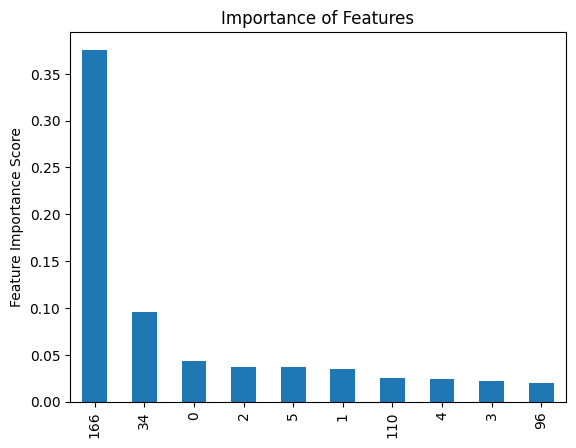

In [6]:
from matplotlib import pyplot

feat_imp = pd.Series(rf_regressor.feature_importances_).sort_values(ascending=False).head(10)
feat_imp.plot(kind='bar', title='Importance of Features')
pyplot.ylabel('Feature Importance Score')